# Практическая работа №1: Исследование алгоритмов формирования аддитивных цепочек

Выполнил студент группы 9304 Арутюнян Владимир, вариант 23.

## Цель работы
Формирование представления о аддитивных цепочках, выработать умение составлять и применять алгоритмы для нахождения минимальных аддитивных цепочек для заданного числа, привить навык использования систем компьютерной алгебры для реализации алгоритмов.

## Постановка задачи
Реализовать точные и приближённые алгоритмы нахождения минимальных аддитивных цепочек с использованием системы компьютерной алгебры SageMath, провести анализ алгоритмов. Полученные результаты содержательно проинтерпретировать.

## Основные теоретические положения

Для возведения некоторого числа $x$ в натуральную степень $n$ за минимальное количество операций есть несколько методов, некоторые из которых приведены ниже.

### Бинарный метод возведения числа в степень
Метод возведения в степень, в котором необходимо записать степень $n$ в двоичной системе счисления:
<center>$n_d = (a_m a_{m-1} a_{m-2} \dots a_2 a_1)_b$, где $a_m = 1$.</center>

Далее следуем аллгоритму:

<ol>
<li> Отбрасываем первый бит двоичного числа; </li>
<li> Двигаемся по двоичному числу слева-направо;
<ol>
<li> Если текущий бит числа равен 1, то возводим текущее число в квадрат, а затем умножаем его на основание;</li>
<li> Если текущий бит числа равен 0, то возводим текущее число в квадрат;</li>   
</ol>
</li>
</ol>

Данный алгоритм позволяет возводить любое число в $n$-ю степень со сложностью $O(log(n))$.

Количество операций умножений равно $\lambda(n) + \nu(n) -1$, где $\lambda(n) = \lfloor lb(n) \rfloor$ и $\nu(n)$ - количество единиц в бинарном представлении числа.

### Метод множителей

Метод возведения в степень, в котором необходимо:

<ol>
<li> Представить число $n$ в виде $n = i \cdot j$, где $i$ - наименьший простой множитель числа $n$; </li>
    
<li> Далее возводим число $x$ в степень $i$;
<li> Рассматриваем новое основание $y = x^i$
</ol>

Если же $n$ изначально простая степень, то считаем $x^{n-1}$ и затем домножаем на $x$.

Число операций такого метода равняется сумме операций для каждого из сомножителей, что в большинстве случаев меньше, чем бинарный метод.

### Определение аддитивной цепочки

Аддитивной цепочкой для некоторого числа $ n \in \mathbb{N}$ называется последовательность чисел $1 = a_1, a_2, a_3, ..., a_m = n$, обладающие свойством $a_i = a_j + a_k$, $k \le j < i$, $i = 1...n$. 

$l(n)$ - наименьшая длина аддитивной цепочки.

При $n \leqslant 1000$ справедлива рекурентная формула: $$ l(n) = min\{ l(n-1)+1,\; l_n\} + \delta_n,$$ <center>где $\delta_n\in\{0, 1\}$, $l_n = \begin{cases} \infty \text{, если n - простое число}  \\ l(q) + l(\frac{n}{q}) \text{, если q - минимальный простой делитель числа n} \end{cases}$</center>

### Метод Брауэра

При некотором $k < log_2 log_2 n$ справедливо неравенство: 
<center>$l(n) < (1+k^{-1})\cdot\lceil\log_2 n\rceil+2^{k-1}-k+2$</center>

Следствия:

1.Пусть $k = \lambda(\lambda(n))-2\lambda(\lambda(\lambda(n)))$, тогда $\lim\limits_{x\to\infty} \cfrac{l(n)}{\lambda(n)} = 1$

$\!$2.Пусть $k = \lambda(\lambda(n))-2\lambda(\lambda(\lambda(n)))$, тогда наилучшая верхняя оценка для длины аддитивной цепочки имеет вид: $\lambda(n)(1+\cfrac{1}{\lambda(\lambda(n))}+\cfrac{o(\lambda(\lambda(\lambda(n))))}{(\lambda(\lambda(n)))^2})$, при $k = \lambda(\lambda(n))-2\lambda(\lambda(\lambda(n)))$

### Алгоритм Яо

Алгоритм для нахождения аддитивной цепочки для числа $n$.
Пусть имеются натуральное число $ n $ и параметр $ k \geq 2 $. Представим $n$ в виде: $$ n = \sum\limits_{i = 0}^{j} 2^{ik} a_{i} $$

Введём функцию $ d \left( z \right) = \sum\limits_{i: a_{i} = z} 2^{ik} $

Цепочка Яо для числа $ n $ и параметра $ k $ начинается со степеней двоек: $ Y_{k} \left( n \right) = \{ 1, 2, 4, \dots, 2^{\lambda \left( n \right)} \} $

После для всех $ z \in \{ 1, 2, \dots, 2^{k} - 1\} $ вычисляются $ d \left( z \right) \ne 0 $ и $ z d\left( z \right) $. Тогда $$ n = \sum\limits_{z = 1}^{2^{k} - 1} z d \left( z \right) $$

Цепочка не обязана быть минимальной.

### Звёздная цепочка

Звёздная цепочка - аддитивная цепочка, которая содержит в себе только звёздные шаги, т.е. $ \forall i \in \{1, 2, \dots, m\}: a_{i} = a_{i - 1} + a_{k} $, где $ k \in \{0, 1, \dots, i - 1\} $. 

$l^*(n)$ - длина звёздной цепочки. $l^*(n) = m$

Очевидно $l^*(n) \ge l(n)$.

### Гипотеза Шольца-Брауэра

Гипотеза Шольца-Брауэра формулируется так: 
$$l^*(2^n-1) \le l^*(n)+n-1$$

### Алгоритм дробления вектора индексов

Алгоритм дробления вектора индексов ищет минимальную звёздную цепочку для числа $ n $.

Определим вектор индексов:

Существует звёздная цепочка $l^*(n) = m, {\{a_i\}}_{i=1}^m, a_1 = 1$, тогда можно определить вектор индексов ${\{r_i\}}_{i=1}^{m-1}\text{, где } r_i = \{x: 1\leqslant x\leqslant i\}$, такой что  $a_i = a_{i-1} + a_{r_{i-1}}\text{, где }2\leqslant i\leqslant m$.

Наибольшая звёздная цепочка $S_{max} = \{1, 2, 4, 8, ..., 2^m\}$ соответствует вектору индексов $r_{max} = \{1, 2, 3, 4, ..., m-1\}$. 

Наименьшая звёздная цепочка  $S_{min} = \{1, 2, 3, 4, ..., m\}$ соответствует вектору индексов $r_{min} = \{1, 1, 1, 1, ..., 1\}$.

Алгоритм является переборным. Вектор индексов разбивается на два вектора: 

1. $r = {\{r_i\}}_{i=1}^{q}$ - фиксированный вектор, 
2. $\rho = {\{\rho_j\}}_{j=q+1}^{m-1}$ меняющийся вектор. 

Можно заметить, что наибольшее значение $a_m$ достигается при векторе индексов ${\{r_i\}}_{i=1}^{q} \cup \{q+1, q+2, ..., m-1\} и \ a_{max} = a_{q+1}\cdot2^{m-q}$. Наименьшее значение $a_m$ достигается при векторе индексов ${\{r_i\}}_{i=1}^{q} \cup \{1, 1, ..., 1\} и \ a_{min} = a_{q+1}+m-q$.


#### Алгоритм

Перебираем все $ \left\{ r_{i} \right\}_{i = 1}^{q} $, для которых вычисляем значения $ a_{min} $ и $ a_{max} $. 

Если $ n \notin \left[ a_{min}; a_{max} \right] $, то переходим к следующему набору $ \left\{ r_{i} \right\}_{i = 1}^{q} $. 

Если $ n \in \left[ a_{min}; a_{max} \right] $, то перебираем все $ \left\{ \rho_{j} \right\}_{j = q + 1}^{m - 1} $ и вычисляем для каждой $ a_{m} $ пока либо оно не станет равным $ n $ и мы не получим ответ, либо пока все $ \rho_{j} $ не станут равными единице. Во втором случае переходим к следующему набору $ \left\{ r_{i} \right\}_{i = 1}^{q} $. 

Если все $ r_{i} $ и $ \rho_{j} $ станут равными 1, то переходим к следующему $ m $, где $\lceil \mathrm{log_2}n \rceil \le m \le \lambda(n)+\nu(n)-1$</li>

# Порядок выполнения работы
1. Применить бинарный метод и метод множителей для $x^n$, где $n \geqslant 30$, для 2-3 значений $n$ (значения $n$
выбирается студентом самостоятельно). Сравнить количество операций для каждого метода, сделать выводы.
2. Реализовать алгоритм Брауэра (для нечётных вариантов) или алгоритм Яо (для чётных вариантов) для вычисления приближённых аддитивных цепочек для различных чисел при варьировании параметра $k$, сопоставить длины полученных аддитивных цепочек с минимальной аддитивной цепочкой для заданного числа. Сделать выводы.
3. Реализовать алгоритм дробления вектора индексов для нахождения минимальной звёздной цепочки для заданного числа. Протестировать алгоритм при $n > 500$. Указать, сколько времени потребовалось на поиск цепочки и какая цепочка получилась. Сравнить с предыдущими методами, сделать выводы.
4. Проверить следствие 1 теоремы Брауэра для $n = 1..200$
путём построения функции $l(n)$
и аппроксимирующей кривой, полученной с помощью метода наименьших квадратов. Сопоставить функции на одном графике, сделать выводы.
5. Проверить гипотезу Шольца–Брауэра для $1 < n \leqslant 10$
на алгоритме дробления вектора индексов. Сделать выводы.
6. Дополнительное необязательное задание: найти и/или предложить модификации алгоритмов и привести описание модификаций. Реализовать модифицированные алгоритмы и сравнить их мощность.

## Выполнение работы
### Бинарный метод и метод множителей

Бинарный метод:

In [61]:
def binary_method(x, n):
    if(x == 1 or x == 0):
        return [x, 1]
    ans = x
    operations = 0
    power = str(bin(n))[3:]
    for i in power:
        ans *= ans
        if i == '1':
            ans *= x
            operations += 1
        operations += 1
    return [ans, operations]

Метод множителей:

In [62]:
def multy_method(x, n):
    if x == 0:
        return [0, 0]
    if n == 1:
        return [x, 0]
    if n == 0 or x == 1:
        return [1, 0]
    pows = factor(n)
    if len(pows) == 1:
        ans = multy_method(x, n - 1) # если простое
        return [ans[0] * x, ans[1] + 1]
    mul1 = binary_method(x, pows[0][0])
    mul2 = binary_method(mul1[0], n // pows[0][0])
    return [mul2[0], mul1[1] + mul2[1]]

Результаты бинарного метода и метода множителей для возведения числа 56:


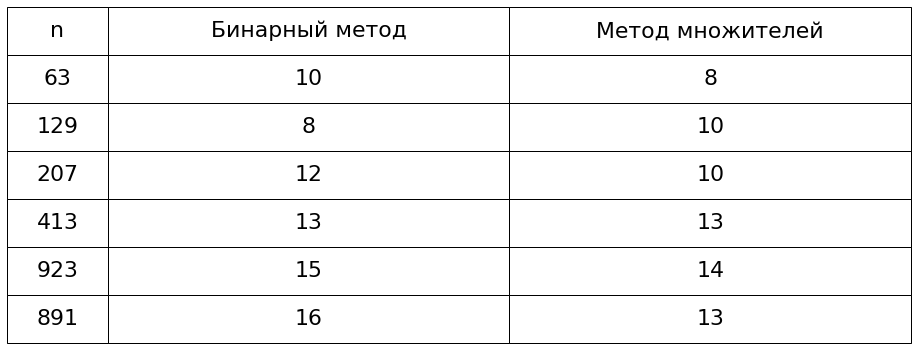

In [63]:
import matplotlib.pyplot as plot 
print('Результаты бинарного метода и метода множителей для возведения числа 56:')

x = 56
text = []
for n in [63, 129, 207, 413,923, 891]:
    text.append([n, binary_method(x, n)[1], multy_method(x, n)[1]])

width_size = .02
table = plot.table(cellText=text, 
                   colWidths=[width_size, width_size * 4, width_size * 4],
                   colLabels = ['n', 'Бинарный метод', 'Метод множителей'],
                   loc='center',
                   cellLoc='center')

table.set_fontsize(22)
table.scale(15, 4)
plot.gca().get_xaxis().set_visible(False)
plot.gca().get_yaxis().set_visible(False)
plot.box(on=None)

### Вывод:
Из полученных выше результатов можем сделать вывод, что в большинстве случаев метод множителей работает быстрее, либо так же, как и бинарный метод. Однако для чисел вида $n = 2^k +1$ бинарный метод работает быстрее.

### Алгоритм Брауэра

Реализация алгоритма Брауэра для вычисления приближённой аддитивной цепочки:

In [64]:
def Brouwer(n, k):
    chain = []
    if n < 2 ** k:
        chain = [i for i in range(1, 2 ** k)]
    else:
        q = n // (2 ** k)
        chain = Brouwer(q, k)
        for i in range(1, k + 1):
            chain.append(2 ** i * q)
        chain.append(n)
    return chain

Результаты алгоритма Брауэра:


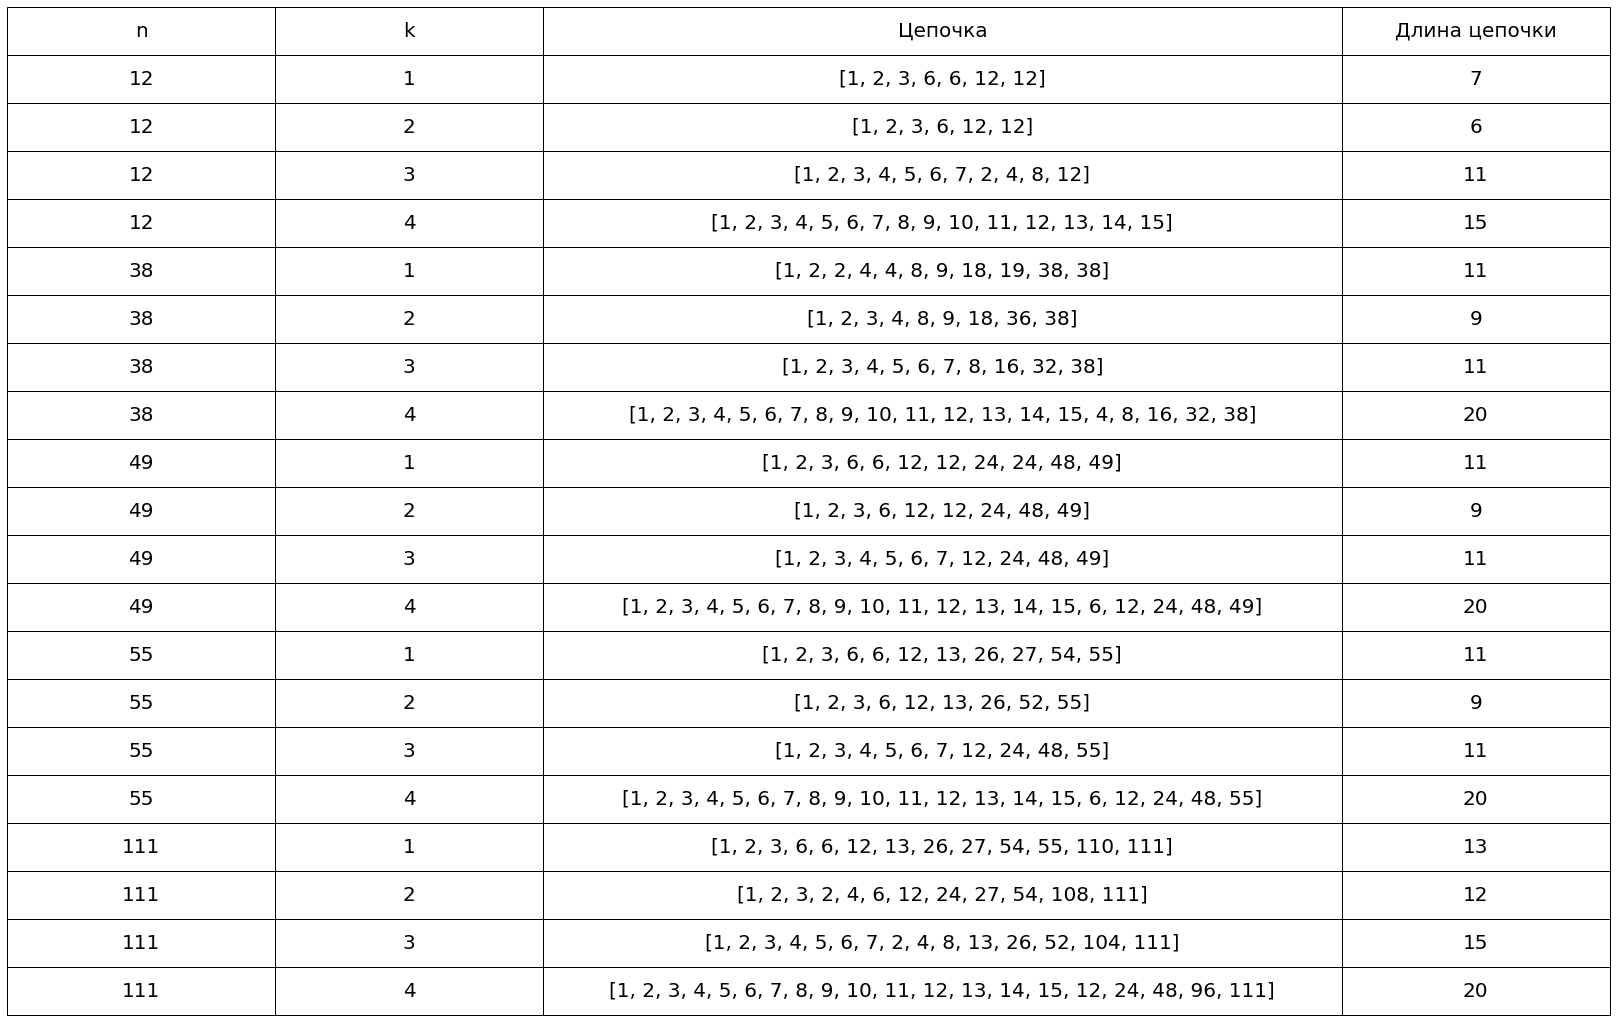

In [65]:
import matplotlib.pyplot as plot 
rows = []
k = 1

numbers = [12, 38, 49, 55, 111]

for n in numbers:
    for k in range(1, 5):
        chain = Brouwer(n, k)
        rows.append([n, k, chain, len(chain)])
    
print('Результаты алгоритма Брауэра:')
    
width_size = .08
table = plot.table(cellText=rows,
                   colWidths=[width_size, width_size, width_size, width_size],
                   cellLoc = 'center', 
                   colLabels = ['n', 'k', 'Цепочка', 'Длина цепочки'],
                   loc = 'center')

table.set_fontsize(20)
table.scale(10, 4) 
table.auto_set_column_width([2])
plot.gca().get_xaxis().set_visible(False)
plot.gca().get_yaxis().set_visible(False)
plot.box(on=None)


Минимальные аддитивные цепочки для заданных чисел:


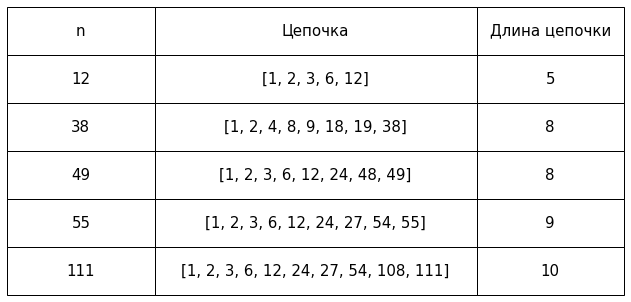

In [66]:
print("Минимальные аддитивные цепочки для заданных чисел:")
text = []
minimal_chains = [[1, 2, 3, 6, 12],
                  [1, 2, 4, 8, 9, 18, 19, 38], 
                  [1, 2, 3, 6, 12, 24, 48, 49],
                  [1, 2, 3, 6, 12, 24, 27, 54, 55],
                  [1, 2, 3, 6, 12, 24, 27, 54, 108, 111]]
for i in range(len(numbers)):
    text.append([numbers[i], minimal_chains[i], len(minimal_chains[i])])

width_size = .04
table1 = plot.table(cellText=text,
                   colWidths=[width_size, width_size, width_size],
                   cellLoc = 'center', 
                   colLabels = ['n', 'Цепочка', 'Длина цепочки'],
                   loc = 'center')

table1.set_fontsize(15)
table1.scale(11, 4) 
table1.auto_set_column_width([1])
plot.gca().get_xaxis().set_visible(False)
plot.gca().get_yaxis().set_visible(False)
plot.box(on=None)


### Вывод:

Из таблицы выше можно сделать вывод, что алгоритм Брауэра не даёт минимальную аддитивную цепочку. При $k = \lambda(\lambda(n))$ можно получить цепочку с наименьшой возможной длиной. Также из-за того, что увеличивается $k$, то и $2^k$ растёт соответственно, а следовательно, длина цепочки становится больше.

Легко заметить наличие повторяющихся элементов в аддитивных цепочках, такое происходит, когда в цепочку добавляется $2q$, если $q < 2^{k-1}$, или $4q$, если $q < 2^{k-2}, ...$.

Если рассмотреть случай n = 12, k = 4, то можно заметить, как была получена вся цепочка от $1$ до $2^{k-1}$, такое допустимо по алгоритму, однако от алгоритма хотелось бы ожидать другого поведения, поэтому далее будет представлен улучшенный алгоритм Брауэра, исправляющий данные проблемы.

# Улучшенный алгоритм Брауэра

Реализация улучшенного алгоритма Брауэра для вычисления приближённой аддитивной цепочки:

In [67]:
def BrouwerMod(n, k):
    chain = {}
    if n < 2 ** k:
        chain = {i for i in range(1, n + 1)}
    else:
        q = n // (2 ** k)
        if (q < 2 ** k):
            chain = {i for i in range(1, 2 ** k)}
        else:
            chain = BrouwerMod(q, k)
        for i in range(1, k + 1):
                chain.add(2 ** i * q)
        chain.add(n)
    return chain

Результаты улучшенного алгоритма Брауэра:


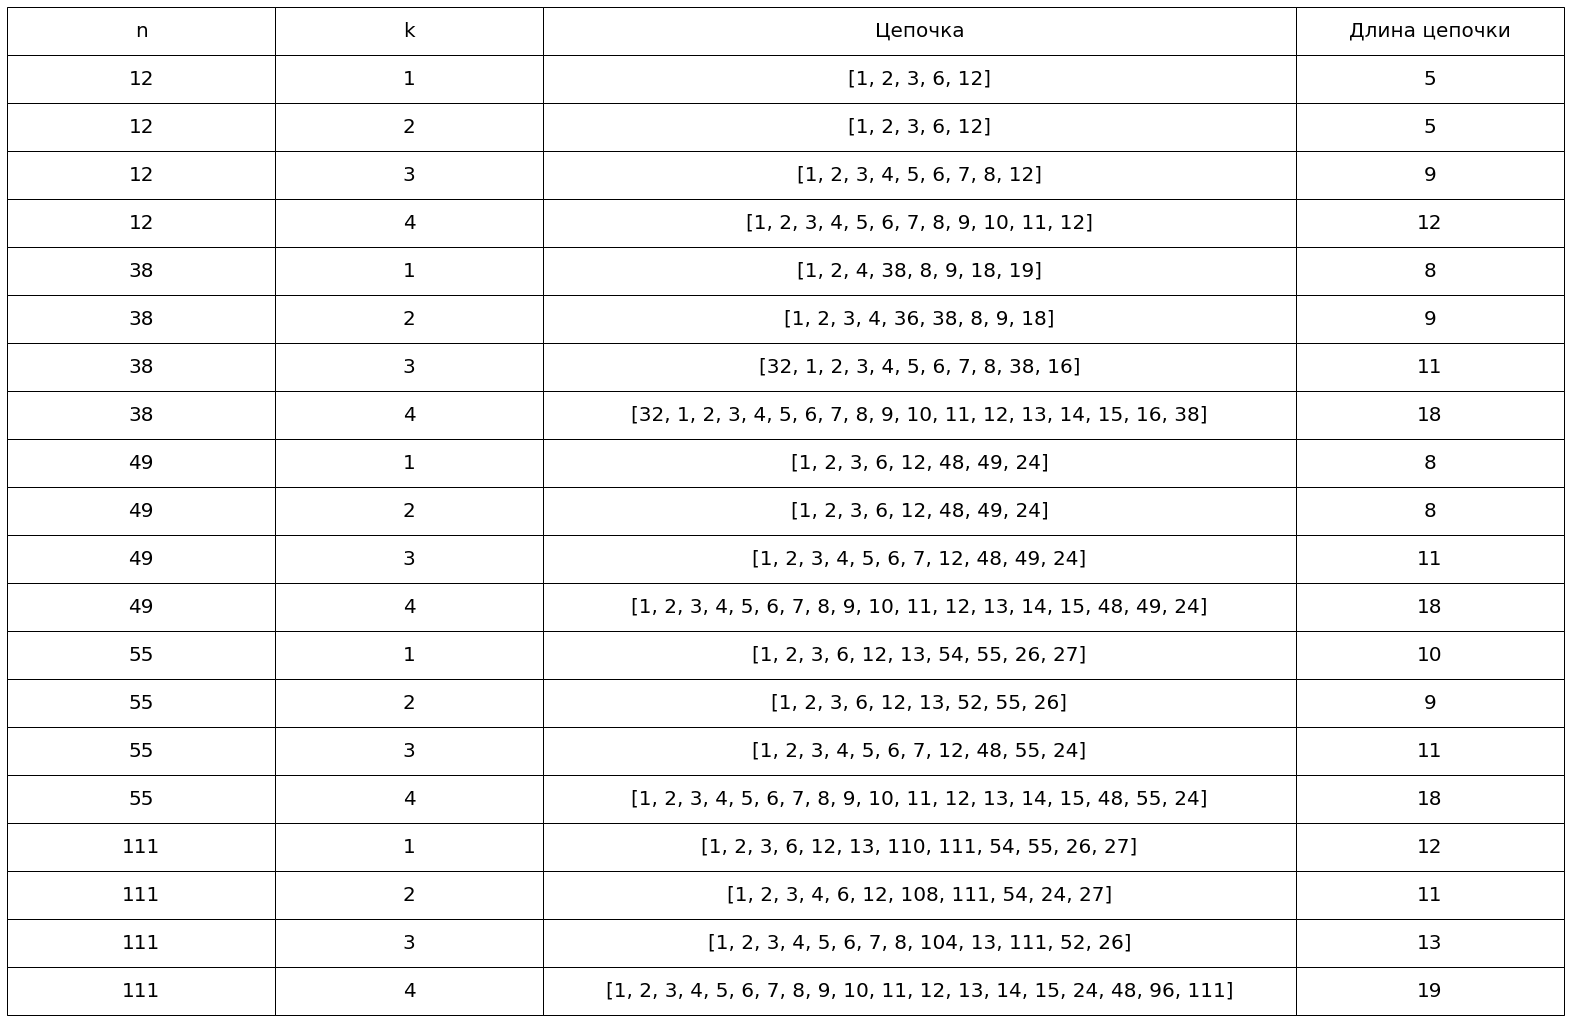

In [68]:
import matplotlib.pyplot as plot 
rows = []
k = 1

numbers = [12, 38, 49, 55, 111]

for n in numbers:
    for k in range(1, 5):
        chain = list(BrouwerMod(n, k))
        rows.append([n, k, chain, len(chain)])
    
print('Результаты улучшенного алгоритма Брауэра:')
    
width_size = .08
table = plot.table(cellText=rows,
                   colWidths=[width_size, width_size, width_size, width_size],
                   cellLoc = 'center', 
                   colLabels = ['n', 'k', 'Цепочка', 'Длина цепочки'],
                   loc = 'center')

table.set_fontsize(20)
table.scale(10, 4) 
table.auto_set_column_width([2])
plot.gca().get_xaxis().set_visible(False)
plot.gca().get_yaxis().set_visible(False)
plot.box(on=None)


#### Вывод:
Как можно заметить по таблице выше, улучшенный алгортим Брауэра исправляет все недостатки обычного алгортима. То есть исключаются повторяющиеся элементы, которые, очевидно, не нужны в цепочке, а также исправляется ситуация, когда печатается вся цепочка до $2^{k-1}$ при $n<2^{k}$ (например, случай при n = 12, k = 4).

### Алгоритм дробления вектора индексов

Реализация алгоритма дробления индексов для нахождения минимальной аддитивной цепочки для числа $n$:

In [69]:
def lambda_(n):
    return int(log(n, 2))


def nu_(n):
    d = str(bin(n))
    nu = 0
    for i in d:
        if i == '1':
            nu += 1
    return nu


def dec_vector(vec, q = 0):
    for i in range(len(vec) - 1, -1, -1):
        if vec[i] == 1:
            vec[i] = i + q + 1
        else:
            vec[i] -= 1
            break
    return vec


def get_chain(indices):
    chain = [1]
    for i in indices:
        chain.append(chain[-1] + chain[i - 1])
    return chain


def index_vector_splitting(n):
    if n == 1:
        return [1]
    vec = []
    l_min = lambda_(n) if 2 ** lambda_(n) == n else lambda_(n) + 1
    l_max = lambda_(n) + nu_(n) - 1
    for m in range(l_min, l_max + 1):
        indices = []
        q = m // 2
        for i in range(1, q + 1):
            indices.append(i) 
        min_indices = [1 for i in range(q)]
        is_not_min = True 
        while is_not_min:
            if indices == min_indices:
                is_not_min = False
            min_vec = [1 for i in range(m - q)]
            max_vec = [i + 1 for i in range(q, m)]
            min_chain = get_chain(indices + min_vec)
            max_chain = get_chain(indices + max_vec)
            a_min = min_chain[-1]
            a_max = max_chain[-1]
            if a_min == n:
                return min_chain
            if a_max == n:
                return max_chain
            if n < a_max and n > a_min:
                min_max_vec = [1 for i in range(len(max_vec))]
                is_not_min_inside = True
                while is_not_min_inside:
                    if max_vec == min_max_vec:
                        is_not_min_inside = False
                    max_vec = dec_vector(max_vec, q)
                    chain = get_chain(indices + max_vec)
                    if chain[-1] == n:
                        return chain  
            indices = dec_vector(indices)
        vec = indices
    res = get_chain(vec)
    return res

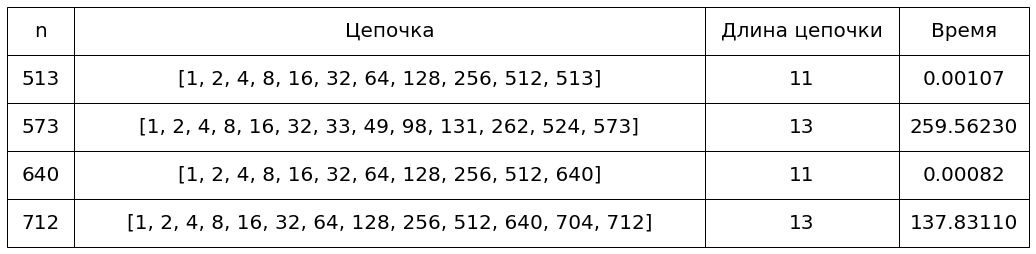

In [56]:
import time
import matplotlib.pyplot as plot 
text = []
numbers = [513, 573, 640, 712]
for n in numbers:
    start = time.time()
    chain = index_vector_splitting(n)
    end = time.time()
    text.append([n, chain, len(chain), f"{(end - start):.5f}"])

width_size = .02
table = plot.table(cellText=text,
                   colWidths=[width_size, width_size, width_size, width_size],
                   cellLoc = 'center', 
                   colLabels = ['n', 'Цепочка', 'Длина цепочки', 'Время'],
                   loc = 'center')

table.set_fontsize(20)
table.scale(10, 4) 
table.auto_set_column_width([1, 2, 3])
plot.gca().get_xaxis().set_visible(False)
plot.gca().get_yaxis().set_visible(False)
plot.box(on=None)

#### Вывод

По таблице можно сделать вывод, что нахождение минимальной аддитивной цепочки методом дробления индексов достаточно долгое, так как алгоритм является переборным.

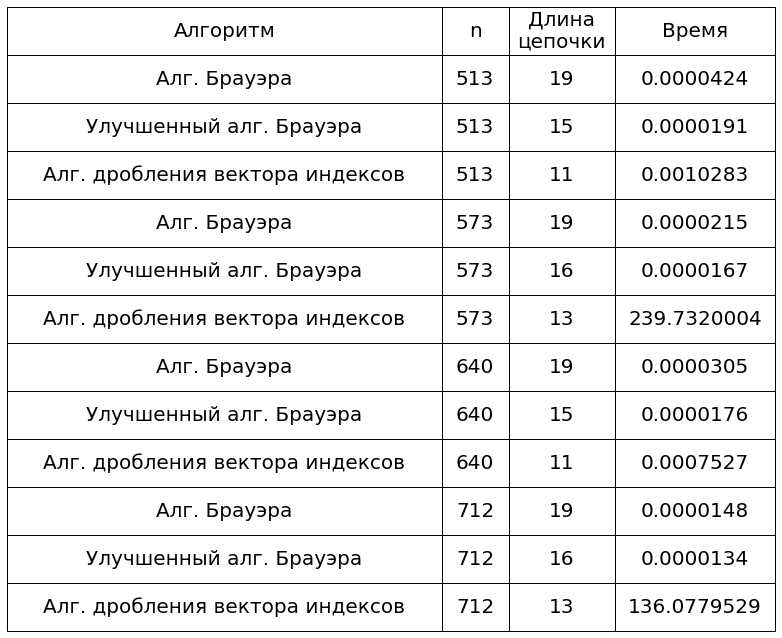

In [57]:
from math import log2
text = []
for i in range(len(numbers)):
    n = numbers[i]
    
    start = time.time()
    algo = Brouwer(n, int(log2(log2(n))))
    end = time.time()
    text.append(["Алг. Брауэра", n, len(algo), f"{(end - start):.7f}"])
    
    start = time.time()
    algo = BrouwerMod(n, int(log2(log2(n))))
    end = time.time()
    text.append(["Улучшенный алг. Брауэра", n, len(algo), f"{(end - start):.7f}"])
    
    start = time.time()
    algo = index_vector_splitting(n)
    end = time.time()
    text.append(["Алг. дробления вектора индексов", n, len(algo), f"{(end - start):.7f}"])
    
width_size = .02
table = plot.table(cellText=text,
                   colWidths=[width_size, width_size, width_size, width_size],
                   cellLoc = 'center', 
                   colLabels = ['Алгоритм', 'n', 'Длина\nцепочки', 'Время'],
                   loc = 'center')

table.set_fontsize(20)
table.scale(10, 4) 
table.auto_set_column_width([0, 2, 3])
plot.gca().get_xaxis().set_visible(False)
plot.gca().get_yaxis().set_visible(False)
plot.box(on=None)
    

#### Вывод

Можно заметить по таблице выше, что метод дробления вектора индексов находит минимальную аддитивную цепочку, однако он является достаточно медленным средством поиска, это происходит по той причине, что алгоритм является переборным.

Улучшенный и обычный алгоритмы Брауэра работают гораздо быстрее, но они не гарантируют нахождение минимальной аддитивной цепочки, что достаточно просто можно заметить по результатам сравнений, приведённым в таблице. Улучшенный алгоритм работает немного быстрее, и находит цепочки с обычно меньшей длиной.

Если необходимо найти минимальную аддитивную цепочку, то следует использовать метод дробления вектора индекса, но это может затребовать большого количества времени при больших $n$, однако если достаточно приближенной цепочки, то лучше использовать улучшенный алгоритм Брауэра.


### Проверка следствия теоремы Брауэра:

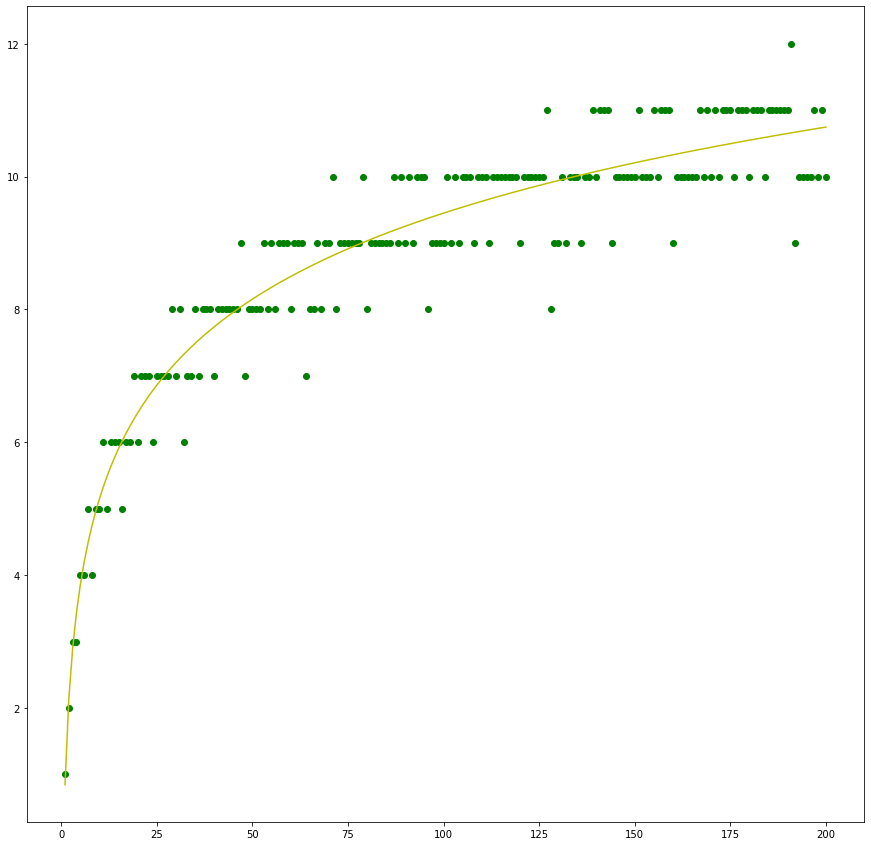

In [60]:
import matplotlib.pyplot as plot 
nums = []
len_chain = []
for i in range(1, 201):
    nums.append(i)
    len_chain.append(len(index_vector_splitting(i)))

plot.figure(figsize=(15, 15))
plot.scatter(nums, len_chain, color='g', marker='o')

def_mat = matrix([[sum([float((math.log(i)**2)) for i in nums]), 
             sum([float(math.log(i)) for i in nums])], 
            [sum([float(math.log(i)) for i in nums]), len(nums)]])
def_vec = vector([sum([float(len_chain[i] * math.log(nums[i])) for i in range(len(nums))]), sum(len_chain)])

def_solution = def_mat.solve_right(def_vec)
plot.plot(nums, [def_solution[0] * math.log(i) + def_solution[1] for i in nums], color='y')
plot.show()

#### Вывод

Из графика видно, что функция $l(n)$ апроксимируется логарифмической кривой. Это подтверждает следствие теоремы Брауэра $\lim\limits_{x\to\infty} \cfrac{l(n)}{\lambda(n)} = 1$.

### Проверка гипотезы Шольца-Брауэра:

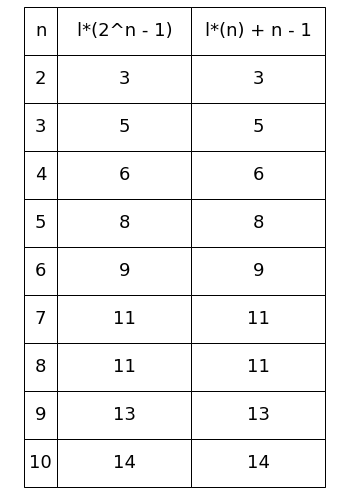

In [9]:
import matplotlib.pyplot as plot 

rows = []
for n in range(2, 11):
    rows.append([n, len(index_vector_splitting(2**n - 1)), 
                 len(index_vector_splitting(n)) + n - 1])

width_size = .01
table = plot.table(cellText=rows, 
                   colWidths=[width_size, width_size * 4, width_size * 4],
                   colLabels = ['n', 'l*(2^n - 1)', 'l*(n) + n - 1'],
                   loc='center',
                   cellLoc='center')
table.set_fontsize(22)
table.scale(10, 4)
plot.gca().get_xaxis().set_visible(False)
plot.gca().get_yaxis().set_visible(False)
plot.box(on=None)


#### Вывод

Из таблицы можно заметить, что гипотеза Шольца-Брауэра была подтверждена $\forall n \in (1,\;10]$
 

## Вывод по практической работе.
1. Были исследованы, проверены и реализованы алгоритмы:

  Возведение в степень:
  
    - Бинарный метод возведения в степень
    - Метод множителей для возведения в степень
    
  Получение аддитивной цепочки для числа:
  
    - Алгоритм Брауэра для приближенного построения аддитивной цепочки и его модификация
    
  Получение минимальной звездной цепочки для числа:
  
    - Алгоритм дробления вектора индексов для построения минимальной аддитивной цепочки
    

2. Были проверены и подтверждены:

    1. Первое следствие из теоремы Брауэра:  $ \lim\limits_{n \rightarrow \infty} \dfrac{l \left( n \right)}{\lambda \left( n \right)} = 1 $
    2. Гипотеза Шольца-Брауэра: $\;l^*(2^n-1) \leq l^*(n) + n - 1$